In [605]:
import pandas
import math
import re
import matplotlib.pyplot as plt
import numpy
import scipy
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc

In [487]:
SKEMPI = pandas.read_csv("skempi_v2.csv", sep = ";")
PDBList = ("1JTG", "5E9D", "3SZK", "3BN9", "2J0T", "1KTZ", "3SGB", "3MZG", "1DAN", "1VFB", "1OGA")
PDBList2 = ("1JTG_A_B", "5E9D_AB_CDE", "3SZK_AB_C", "3BN9_B_CD", "2J0T_A_D",
           "1KTZ_A_B", "3SGB_E_I", "3MZG_A_B", "1DAN_HL_UT", "1VFB_AB_C", "1OGA_ABC_DE")

#filtered_SKEMPI = SKEMPI[SKEMPI["#Pdb"].isin(PDBList2)]
filtered_SKEMPI = SKEMPI
filtered_df = filtered_SKEMPI[filtered_SKEMPI['Mutation(s)_cleaned'].str.len() <= 7]

In [695]:
def ddG(aff_wt, aff_mut):
    constant = (8.314/4184)*(273.15 + 25.0)
    return constant * (math.log(aff_mut) - math.log(aff_wt))
def accuracyscore(target, prediction):
    return (target - prediction) * (target - prediction)
constant = (8.314/4184)*(273.15 + 25.0)
print(constant)

0.5924519837476099


In [491]:
ddG_1DAN = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1DAN_af2.txt", sep = " ")
ddG_1JTG = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1JTG_af2.txt", sep = " ")
ddG_1KTZ = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1KTZ_af2.txt", sep = " ")
ddG_1OGA = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1OGA_af2.txt", sep = " ")
ddG_1VFB = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1VFB_af2.txt", sep = " ")
ddG_2J0T = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_2J0T_af2.txt", sep = " ")
ddG_3BN9 = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3BN9_af2.txt", sep = " ")
ddG_3MZG = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3MZG_af2.txt", sep = " ")
ddG_3SGB = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3SGB_af2.txt", sep = " ")
ddG_3SZK = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3SZK_af2.txt", sep = " ")
ddG_5E9D = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_5E9D_af2.txt", sep = " ")
ddG_1AO7 = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1AO7_af2.txt", sep = " ")
ddG_1CHO = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1CHO_af2.txt", sep = " ")
ddG_1IAR = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1IAR_af2.txt", sep = " ")
ddG_1KNE = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1KNE_af2.txt", sep = " ")
ddG_1MHP = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1MHP_af2.txt", sep = " ")
ddG_1PPF = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1PPF_af2.txt", sep = " ")
ddG_1R0R = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1R0R_af2.txt", sep = " ")
ddG_2FTL = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_2FTL_af2.txt", sep = " ")
ddG_2JEL = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_2JEL_af2.txt", sep = " ")
ddG_3HFM = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3HFM_af2.txt", sep = " ")
ddG_1DAN_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1DAN_af3.txt", sep = " ")
ddG_1JTG_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1JTG_af3.txt", sep = " ")
ddG_1KTZ_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1KTZ_af3.txt", sep = " ")
ddG_1OGA_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1OGA_af3.txt", sep = " ")
ddG_1VFB_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1VFB_af3.txt", sep = " ")
ddG_2J0T_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_2J0T_af3.txt", sep = " ")
ddG_3BN9_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3BN9_af3.txt", sep = " ")
ddG_3MZG_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3MZG_af3.txt", sep = " ")
ddG_3SGB_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3SGB_af3.txt", sep = " ")
ddG_3SZK_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3SZK_af3.txt", sep = " ")
ddG_5E9D_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_5E9D_af3.txt", sep = " ")
ddG_1AO7_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1AO7_af3.txt", sep = " ")
ddG_1CHO_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1CHO_af3.txt", sep = " ")
ddG_1IAR_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1IAR_af3.txt", sep = " ")
ddG_1KNE_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1KNE_af3.txt", sep = " ")
ddG_1MHP_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1MHP_af3.txt", sep = " ")
ddG_1PPF_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1PPF_af3.txt", sep = " ")
ddG_1R0R_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1R0R_af3.txt", sep = " ")
ddG_2FTL_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_2FTL_af3.txt", sep = " ")
ddG_2JEL_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_2JEL_af3.txt", sep = " ")
ddG_3HFM_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3HFM_af3.txt", sep = " ")
#ddG_1DAN_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1DAN.txt", sep = " ")
ddG_1JTG_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1JTG.txt", sep = " ")
ddG_1KTZ_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1KTZ.txt", sep = " ")
#ddG_1OGA_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1OGA.txt", sep = " ")
ddG_1VFB_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1VFB.txt", sep = " ")
ddG_2J0T_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_2J0T.txt", sep = " ")
ddG_3BN9_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3BN9.txt", sep = " ")
ddG_3MZG_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3MZG.txt", sep = " ")
ddG_3SGB_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3SGB.txt", sep = " ")
ddG_3SZK_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3SZK.txt", sep = " ")
ddG_5E9D_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_5E9D.txt", sep = " ")

In [493]:
SKEMPI_1DAN = filtered_df[filtered_df['#Pdb'].isin(["1DAN_HL_UT"])] #Special Case
SKEMPI_1JTG = filtered_df[filtered_df['#Pdb'].isin(["1JTG_A_B"])]
SKEMPI_1KTZ = filtered_df[filtered_df['#Pdb'].isin(["1KTZ_A_B"])]
SKEMPI_1OGA = filtered_df[filtered_df['#Pdb'].isin(["1OGA_ABC_DE"])]
SKEMPI_1VFB = filtered_df[filtered_df['#Pdb'].isin(["1VFB_AB_C"])]
SKEMPI_2J0T = filtered_df[filtered_df['#Pdb'].isin(["2J0T_A_D"])]
SKEMPI_3BN9 = filtered_df[filtered_df['#Pdb'].isin(["3BN9_B_CD"])]
SKEMPI_3MZG = filtered_df[filtered_df['#Pdb'].isin(["3MZG_A_B"])]
SKEMPI_3SGB = filtered_df[filtered_df['#Pdb'].isin(["3SGB_E_I"])]
SKEMPI_3SZK = filtered_df[filtered_df['#Pdb'].isin(["3SZK_AB_C"])]
SKEMPI_5E9D = filtered_df[filtered_df['#Pdb'].isin(["5E9D_AB_CDE"])] #Special Case
SKEMPI_1AO7 = filtered_df[filtered_df['#Pdb'].isin(["1AO7_ABC_DE"])]
SKEMPI_1CHO = filtered_df[filtered_df['#Pdb'].isin(["1CHO_EFG_I"])]
SKEMPI_1IAR = filtered_df[filtered_df['#Pdb'].isin(["1IAR_A_B"])]
SKEMPI_1KNE = filtered_df[filtered_df['#Pdb'].isin(["1KNE_A_P"])]
SKEMPI_1MHP = filtered_df[filtered_df['#Pdb'].isin(["1MHP_HL_A"])]
SKEMPI_1PPF = filtered_df[filtered_df['#Pdb'].isin(["1PPF_E_I"])]
SKEMPI_1R0R = filtered_df[filtered_df['#Pdb'].isin(["1R0R_E_I"])]
SKEMPI_2FTL = filtered_df[filtered_df['#Pdb'].isin(["2FTL_E_I"])]
SKEMPI_2JEL = filtered_df[filtered_df['#Pdb'].isin(["2JEL_LH_P"])]
SKEMPI_3HFM = filtered_df[filtered_df['#Pdb'].isin(["3HFM_HL_Y"])]
#ddG_1DAN_xtal = ddG_1DAN_xtal[ddG_1DAN_xtal['variant'].str.len() <= 7]
ddG_1JTG_xtal = ddG_1JTG_xtal[ddG_1JTG_xtal['variant'].str.len() <= 7]
ddG_1KTZ_xtal = ddG_1KTZ_xtal[ddG_1KTZ_xtal['variant'].str.len() <= 7]
#ddG_1OGA_xtal = ddG_1OGA_xtal[ddG_1OGA_xtal['variant'].str.len() <= 7]
ddG_1VFB_xtal = ddG_1VFB_xtal[ddG_1VFB_xtal['variant'].str.len() <= 7]
ddG_2J0T_xtal = ddG_2J0T_xtal[ddG_2J0T_xtal['variant'].str.len() <= 7]
ddG_3BN9_xtal = ddG_3BN9_xtal[ddG_3BN9_xtal['variant'].str.len() <= 7]
ddG_3MZG_xtal = ddG_3MZG_xtal[ddG_3MZG_xtal['variant'].str.len() <= 7]
ddG_3SGB_xtal = ddG_3SGB_xtal[ddG_3SGB_xtal['variant'].str.len() <= 7]
ddG_3SZK_xtal = ddG_3SZK_xtal[ddG_3SZK_xtal['variant'].str.len() <= 7]
ddG_5E9D_xtal = ddG_5E9D_xtal[ddG_5E9D_xtal['variant'].str.len() <= 7]

In [495]:
def extract_key(s):
    match = re.match(r"(.)(.)(\d+)(.)", s)
    if match:
        _, amino, pos, mut = match.groups()
        return (amino, int(pos), mut)  # Sort first by character Y, then by number
    return ("", 0)  # Fallback, if needed
custom_order = {'H': 0, 'L': 1, 'U': 2, 'T': 3}  # Lower number means higher priority

def extract_key_sp(s):
    match = re.match(r"(.)(.)(\d+)(.)", s)  # First char, sorting char, number, last char
    if match:
        _, y, num, _ = match.groups()
        return (custom_order.get(y, 99), int(num))  # Default rank 99 if char not found
    return (99, 0)  # Fallback case
strings = ["XA12C", "XB3D", "XA5E", "XB20C", "XA2C"]
sorted_strings = sorted(strings, key=extract_key)
#print(sorted_strings)
df_sorted = SKEMPI_1JTG.sort_values(by="Mutation(s)_cleaned", key=lambda col: col.map(extract_key))
#print(df_sorted)

In [761]:
mut_type_dict = {
    'A': 0, 'V': 0, 'I': 0, 'L': 0, 'M': 0, 
    'F': 0, 'Y': 0, 'W': 0, 'S': 1, 'T': 1, 
    'N': 1, 'Q': 1, 'R': 2, 'H': 2, 'K': 2, 
    'D': 3, 'E': 3, 'C': 4, 'G': 4, 'P': 4
}
color_dict = {
    0 : "Same Type", 1 : "Hydrophobic to Polar", 2 : "Hydrophobic to Positive", 3 : "Hydrophobic to Negative", 4 : "Hydrophobic to Other",
    10 : "Any to Hydrophobic", 11 : "Same Type", 12 : "Polar to Positive", 13 : "Polar to Negative", 14 : "Any to Other",
    20 : "Any to Hydrophobic", 21 : "Positive to Polar", 22 : "Same Type", 23 : "Positive to Negative", 24 : "Any to Other",
    30 : "Any to Hydrophobic", 31 : "Negative to Polar", 32 : "Negative to Positive", 33 : "Same Type", 34 : "Any to Other",
    40 : "Any to Hydrophobic", 41 : "Hydrophobic to Polar", 42 : "Hydrophobic to Positive", 43: "Hydrophobic to Negative", 44: "Same Type"
}


def getoutput(SKEMPI, ddG_out, title, struc_type):
    SKEMPI_sorted = SKEMPI.sort_values(by="Mutation(s)_cleaned", key=lambda col: col.map(extract_key))#
    if (title == "1DAN"):
        SKEMPI_sorted = SKEMPI.sort_values(by="Mutation(s)_cleaned", key=lambda col: col.map(extract_key_sp))
    xvals = []
    yvals = []
    nans = []
    pdbs = []
    struc_types = []
    muts = []
    mut_types = []
    locs = []
    if (title == "1VFB"):
        xdupes = ["YB101A"]
    elif (title == "5E9D"):
        xdupes = ["TD90Q", "YD49W", "KD96Q"]
    elif (title == "1AO7"):
        xdupes = ["IE52R"]
    else:
        xdupes = []
    ydupes = []
    length = len(SKEMPI)
    i = 0
    for index, row in SKEMPI_sorted.iterrows():
        cur = row["Mutation(s)_cleaned"]
        if (cur not in xdupes and (math.isnan(row["Affinity_wt_parsed"]) or math.isnan(row["Affinity_mut_parsed"]))):
            nans.append(i)
            i += 1
        elif (cur not in xdupes):
            xval = ddG(row["Affinity_wt_parsed"], row["Affinity_mut_parsed"])
            xvals.append(xval)
            xdupes.append(cur)
            pdbs.append(title)
            struc_types.append(struc_type)
            muts.append(cur)
            #Mut_types
            match = re.match(r"(.)(.)(\d+)(.)", row["Mutation(s)_cleaned"])
            fro = mut_type_dict[match.groups()[0]]
            to = mut_type_dict[match.groups()[3]]
            mut_type = (fro * 10) + to
            mut_types.append(color_dict[mut_type])
            locs.append(row["iMutation_Location(s)"])
            i += 1
    k = 0
    for index, row in ddG_out.iterrows():
        if ("=" not in row["variant"] and k in nans):
            k += 1
        elif ("=" not in row["variant"] and row["variant"] != "Y208A"):
            yvals.append(row["mean_ddG"])
            ydupes.append(row["variant"])
            k += 1
    values = pandas.DataFrame([xvals, yvals, pdbs, struc_types, muts, mut_types, locs])
    return values

def getcorrelation(x_data, y_data, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(6.0, 6.0)
    plt.scatter(x_data, y_data)
    ax.set_xlim([-4, 12])
    ax.set_ylim([-4, 12])
    plt.xlabel("SKEMPI ddG")
    plt.ylabel("Predicted ddG")
    plt.title(title)
    plt.axline((0, 0), slope=1)
    xpos = 5
    if (title == "5E9D"):
        xpos = 1
    plt.text(xpos, 0, "Pearson: %.3f" % numpy.corrcoef(x_data, y_data)[1][0])
    plt.show()

In [763]:
_1DAN = getoutput(SKEMPI_1DAN, ddG_1DAN, "1DAN", "Other")
_1JTG = getoutput(SKEMPI_1JTG, ddG_1JTG, "1JTG", "Other")
_1KTZ = getoutput(SKEMPI_1KTZ, ddG_1KTZ, "1KTZ", "Other")
_1OGA = getoutput(SKEMPI_1OGA, ddG_1OGA, "1OGA", "TCR/pMHC")
_1VFB = getoutput(SKEMPI_1VFB, ddG_1VFB, "1VFB", "AB/AG")
_2J0T = getoutput(SKEMPI_2J0T, ddG_2J0T, "2J0T", "Other")
_3BN9 = getoutput(SKEMPI_3BN9, ddG_3BN9, "3BN9", "AB/AG")
_3MZG = getoutput(SKEMPI_3MZG, ddG_3MZG, "3MZG", "Other")
_3SGB = getoutput(SKEMPI_3SGB, ddG_3SGB, "3SGB", "Pr/PI")
_3SZK = getoutput(SKEMPI_3SZK, ddG_3SZK, "3SZK", "Other")
_5E9D = getoutput(SKEMPI_5E9D, ddG_5E9D, "5E9D", "TCR/pMHC")
_1AO7 = getoutput(SKEMPI_1AO7, ddG_1AO7, "1AO7", "TCR/pMHC")
_1CHO = getoutput(SKEMPI_1CHO, ddG_1CHO, "1CHO", "Pr/PI")
_1IAR = getoutput(SKEMPI_1IAR, ddG_1IAR, "1IAR", "Other")
_1KNE = getoutput(SKEMPI_1KNE, ddG_1KNE, "1KNE", "Other")
_1MHP = getoutput(SKEMPI_1MHP, ddG_1MHP, "1MHP", "AB/AG")
_1PPF = getoutput(SKEMPI_1PPF, ddG_1PPF, "1PPF", "Pr/PI")
_1R0R = getoutput(SKEMPI_1R0R, ddG_1R0R, "1R0R", "Pr/PI")
_2FTL = getoutput(SKEMPI_2FTL, ddG_2FTL, "2FTL", "Pr/PI")
_2JEL = getoutput(SKEMPI_2JEL, ddG_2JEL, "2JEL", "AB/AG")
_3HFM = getoutput(SKEMPI_3HFM, ddG_3HFM, "3HFM", "AB/AG")

_1DAN_3 = getoutput(SKEMPI_1DAN, ddG_1DAN_af3, "1DAN", "Other")
_1JTG_3 = getoutput(SKEMPI_1JTG, ddG_1JTG_af3, "1JTG", "Other")
_1KTZ_3 = getoutput(SKEMPI_1KTZ, ddG_1KTZ_af3, "1KTZ", "Other")
_1OGA_3 = getoutput(SKEMPI_1OGA, ddG_1OGA_af3, "1OGA", "TCR/pMHC")
_1VFB_3 = getoutput(SKEMPI_1VFB, ddG_1VFB_af3, "1VFB", "AB/AG")
_2J0T_3 = getoutput(SKEMPI_2J0T, ddG_2J0T_af3, "2J0T", "Other")
_3BN9_3 = getoutput(SKEMPI_3BN9, ddG_3BN9_af3, "3BN9", "AB/AG")
_3MZG_3 = getoutput(SKEMPI_3MZG, ddG_3MZG_af3, "3MZG", "Other")
_3SGB_3 = getoutput(SKEMPI_3SGB, ddG_3SGB_af3, "3SGB", "Pr/PI")
_3SZK_3 = getoutput(SKEMPI_3SZK, ddG_3SZK_af3, "3SZK", "Other")
_5E9D_3 = getoutput(SKEMPI_5E9D, ddG_5E9D_af3, "5E9D", "TCR/pMHC")
_1AO7_3 = getoutput(SKEMPI_1AO7, ddG_1AO7_af3, "1AO7", "TCR/pMHC")
_1CHO_3 = getoutput(SKEMPI_1CHO, ddG_1CHO_af3, "1CHO", "Pr/PI")
_1IAR_3 = getoutput(SKEMPI_1IAR, ddG_1IAR_af3, "1IAR", "Other")
_1KNE_3 = getoutput(SKEMPI_1KNE, ddG_1KNE_af3, "1KNE", "Other")
_1MHP_3 = getoutput(SKEMPI_1MHP, ddG_1MHP_af3, "1MHP", "AB/AG")
_1PPF_3 = getoutput(SKEMPI_1PPF, ddG_1PPF_af3, "1PPF", "Pr/PI")
_1R0R_3 = getoutput(SKEMPI_1R0R, ddG_1R0R_af3, "1R0R", "Pr/PI")
_2FTL_3 = getoutput(SKEMPI_2FTL, ddG_2FTL_af3, "2FTL", "Pr/PI")
_2JEL_3 = getoutput(SKEMPI_2JEL, ddG_2JEL_af3, "2JEL", "AB/AG")
_3HFM_3 = getoutput(SKEMPI_3HFM, ddG_3HFM_af3, "3HFM", "AB/AG")

#_1DAN_x = getoutput(SKEMPI_1DAN, ddG_1DAN_xtal, "1DAN", "Other")
_1JTG_x = getoutput(SKEMPI_1JTG, ddG_1JTG_xtal, "1JTG", "Other")
_1KTZ_x = getoutput(SKEMPI_1KTZ, ddG_1KTZ_xtal, "1KTZ", "Other")
#_1OGA_x = getoutput(SKEMPI_1OGA, ddG_1OGA_xtal, "1OGA", "TCR/pMHC")
_1VFB_x = getoutput(SKEMPI_1VFB, ddG_1VFB_xtal, "1VFB", "AB/AG")
_2J0T_x = getoutput(SKEMPI_2J0T, ddG_2J0T_xtal, "2J0T", "Other")
_3BN9_x = getoutput(SKEMPI_3BN9, ddG_3BN9_xtal, "3BN9", "AB/AG")
_3MZG_x = getoutput(SKEMPI_3MZG, ddG_3MZG_xtal, "3MZG", "Other")
_3SGB_x = getoutput(SKEMPI_3SGB, ddG_3SGB_xtal, "3SGB", "Pr/PI")
_3SZK_x = getoutput(SKEMPI_3SZK, ddG_3SZK_xtal, "3SZK", "Other")
_5E9D_x = getoutput(SKEMPI_5E9D, ddG_5E9D_xtal, "5E9D", "TCR/pMHC")

In [1027]:
full_af2 = pandas.concat([_1DAN, _1JTG, _1KTZ, _1OGA, _1VFB, _2J0T, _3BN9, _3MZG, _3SGB, _3SZK, _5E9D, _1AO7, _1CHO, _1IAR, _1KNE, _1MHP, _1PPF, _1R0R, _2FTL, _2JEL, _3HFM], axis=1)
full_af3 = pandas.concat([_1DAN_3, _1JTG_3, _1KTZ_3, _1OGA_3, _1VFB_3, _2J0T_3, _3BN9_3, _3MZG_3, _3SGB_3, _3SZK_3, _5E9D_3, _1AO7_3, _1CHO_3, _1IAR_3, _1KNE_3, _1MHP_3, _1PPF_3, _1R0R_3, _2FTL_3, _2JEL_3, _3HFM_3], axis=1)
full_xtal = pandas.concat([_1JTG_x, _1KTZ_x, _1VFB_x, _2J0T_x, _3BN9_x, _3MZG_x, _3SGB_x, _3SZK_x, _5E9D_x], axis=1)
full_af2 = pandas.concat([_1JTG, _1KTZ, _1VFB, _2J0T, _3BN9, _3MZG, _3SGB, _3SZK, _5E9D], axis=1)
full_af3 = pandas.concat([_1JTG_3, _1KTZ_3, _1VFB_3, _2J0T_3, _3BN9_3, _3MZG_3, _3SGB_3, _3SZK_3, _5E9D_3], axis=1)
#print(full_xtal)

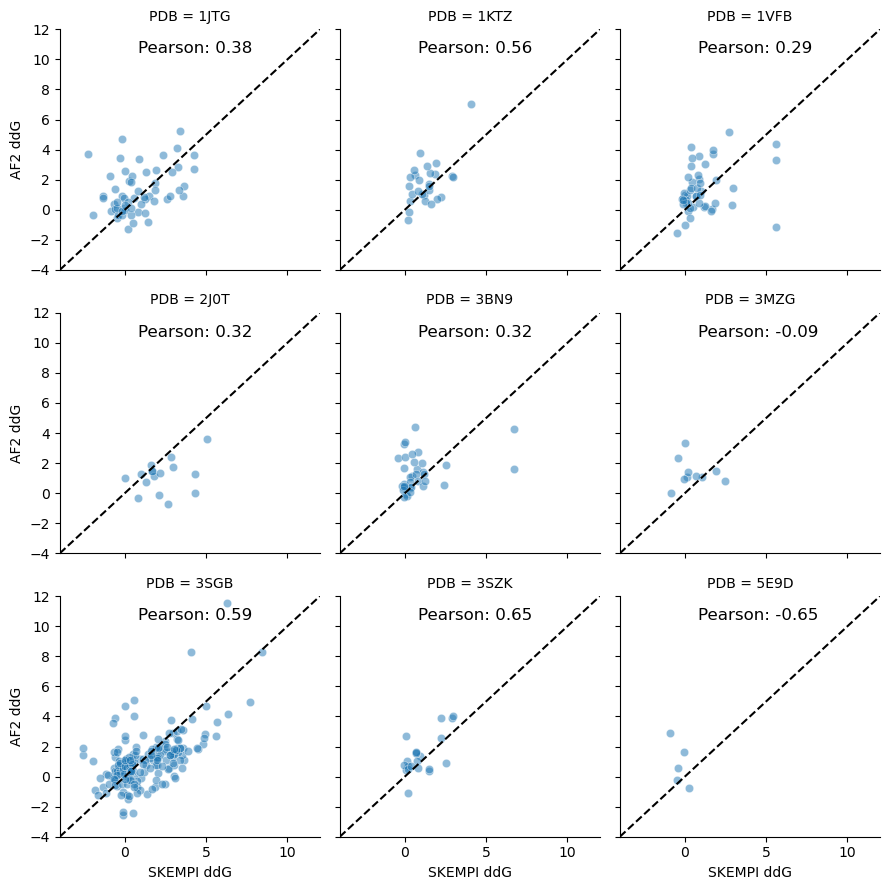

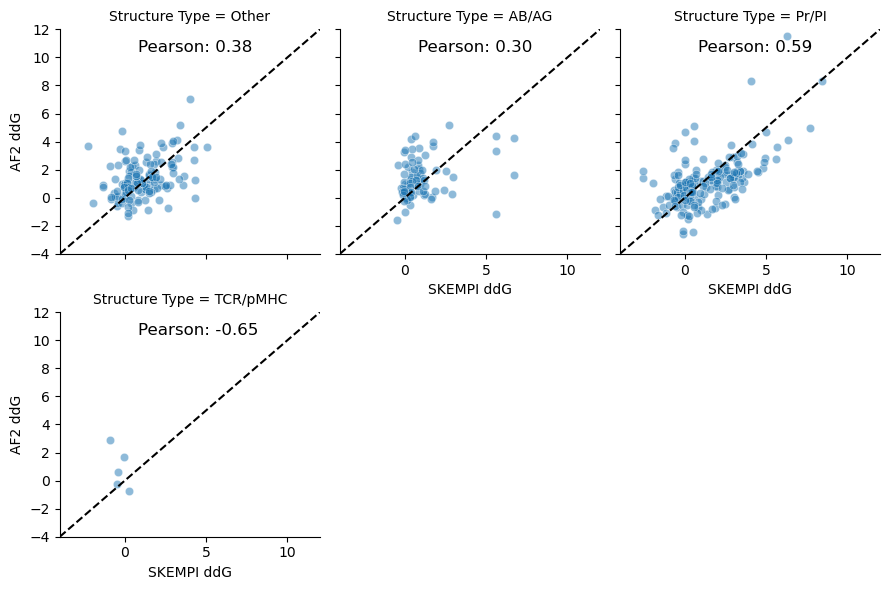

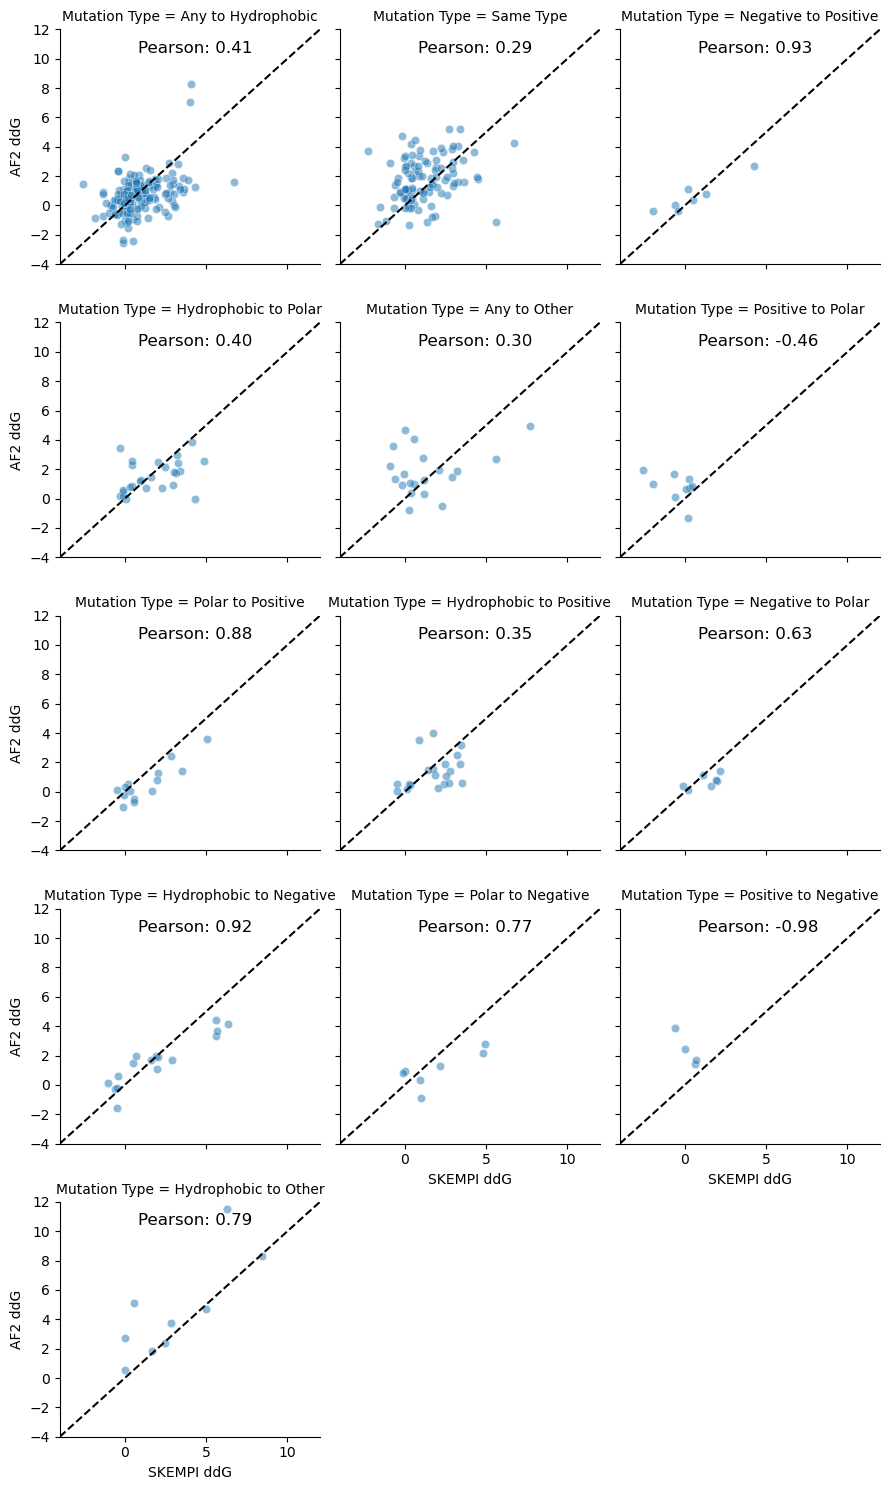

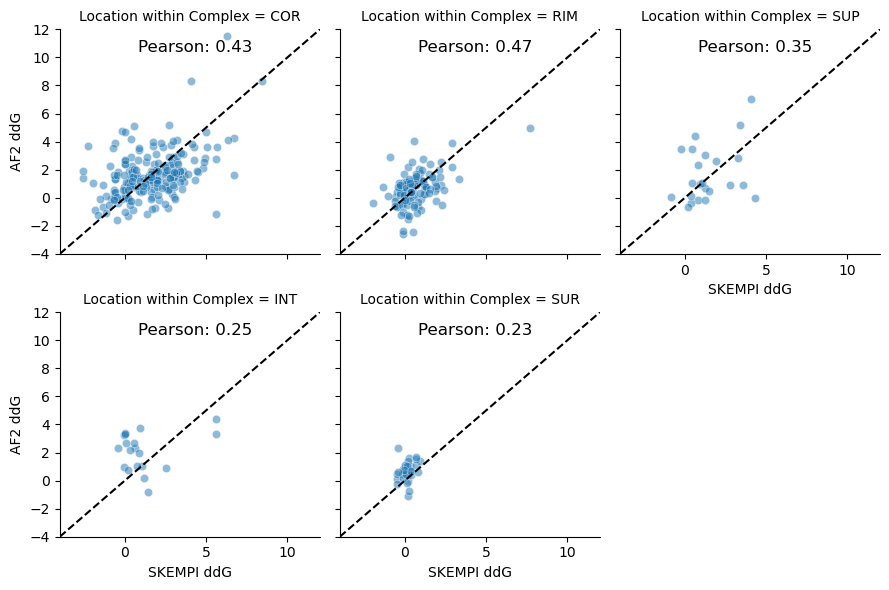

In [1059]:
SKEMPI_ddGs = []
af2_ddGs = []
af3_ddGs = []
PDBs = []
Structure_Types = []
Mutations = []
Mutation_Types = []
Locations = []
for index, row in full_af2.iterrows():
    for each in row:
        if (index == 0):
            SKEMPI_ddGs.append(each)
        elif (index == 1):
            af2_ddGs.append(each)
        elif (index == 2):
            PDBs.append(each)
        elif (index == 3):
            Structure_Types.append(each)
        elif (index == 4):
            Mutations.append(each)
        elif (index == 5):
            Mutation_Types.append(each)
        elif (index == 6):
            Locations.append(each)
for index, row in full_af3.iterrows():
    for each in row:
        if (index == 1):
            af3_ddGs.append(each)
SKEMPI_xtal = []
xtal_ddGs = []
skip = False
for index, row in full_xtal.iterrows():
    for each in row:
        if (skip):
            skip = False
        elif (index == 0):
            if (math.isnan(each) or "None" in str(each)):
                skip = True
            SKEMPI_xtal.append(each)
        elif (index == 1):
            if ("None" in str(each)):
                SKEMPI_xtal = SKEMPI_xtal[:-1]
            else:
                xtal_ddGs.append(each)
                #print(each)

af2temp = pandas.DataFrame({
    'SKEMPI ddG': SKEMPI_ddGs,
    'AF2 ddG': af2_ddGs,
    'PDB': PDBs,
    'Structure Type': Structure_Types,
    'Mutation Type': Mutation_Types,
    'Location within Complex': Locations
})

g = sns.FacetGrid(af2temp, col='PDB', col_wrap = 3, height = 3)

def scatter_with_correlation(data, **kwargs):
    # Scatter plot
    scatter = sns.scatterplot(x='SKEMPI ddG', y='AF2 ddG', data=data, **kwargs, alpha = 0.5)
    # Calculate the Pearson correlation
    corr, _ = scipy.stats.pearsonr(data['SKEMPI ddG'], data['AF2 ddG'])
    # Add the dashed line y = x (slope 1, intercept 0)
    plt.plot([-4, 12], 
             [-4, 12], 
             linestyle='--', color='black', label="y = x")
    scatter.set_xlim(left=-4, right=12)
    scatter.set_ylim(bottom=-4, top=12)
    # Annotate the Pearson correlation
    plt.annotate(f'Pearson: {corr:.2f}', 
                 xy=(0.3, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='black')
g.map_dataframe(scatter_with_correlation)
g.savefig('af2_by_PDB.pdf', format='pdf')

struc2 = sns.FacetGrid(af2temp, col='Structure Type', col_wrap = 3, height = 3)
struc2.map_dataframe(scatter_with_correlation)
struc2.savefig('af2_by_struc.pdf', format='pdf')

mut2 = sns.FacetGrid(af2temp, col='Mutation Type', col_wrap = 3, height = 3)
mut2.map_dataframe(scatter_with_correlation)
mut2.savefig('af2_by_muttype.pdf', format='pdf')

loc2 = sns.FacetGrid(af2temp, col='Location within Complex', col_wrap = 3, height = 3)
loc2.map_dataframe(scatter_with_correlation)
loc2.savefig('af2_by_loc.pdf', format='pdf')
                
#i = 0
#RMSD_score_af2 = 0
#RMSD_score_af3 = 0
#while (i < len(af2_ddGs)):
    
  #  try:
  #      RMSD_score_af2 += accuracyscore(SKEMPI_ddGs[i], af2_ddGs[i])
   # except:
   #     print(Mutations[i])
   # RMSD_score_af3 += accuracyscore(SKEMPI_ddGs[i], af3_ddGs[i])
   # i += 1
#print(math.sqrt(RMSD_score_af2/len(af2_ddGs)))
#print(math.sqrt(RMSD_score_af3/len(af2_ddGs)))

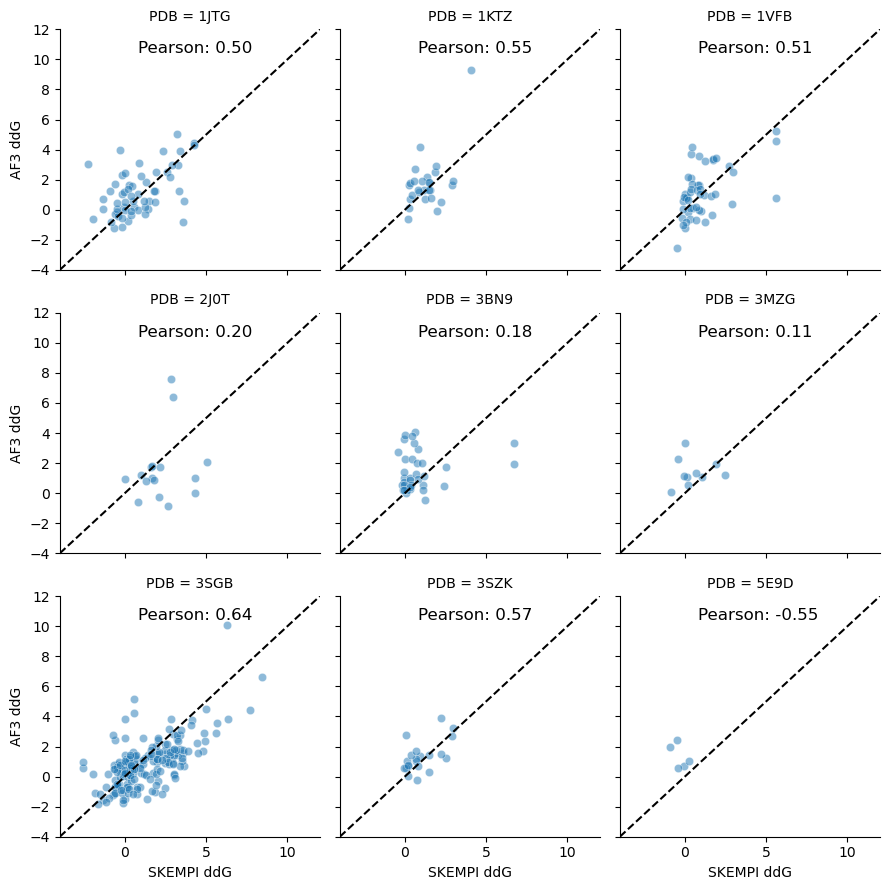

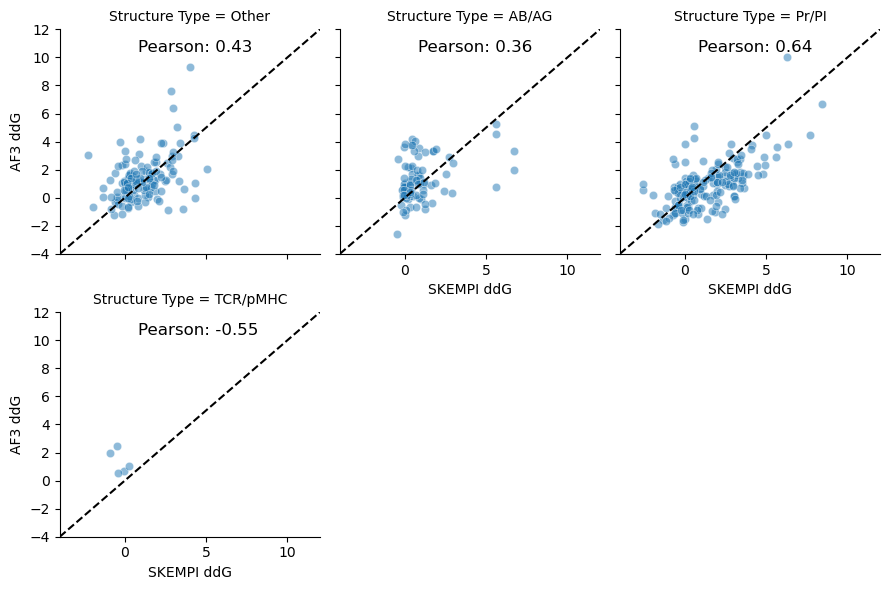

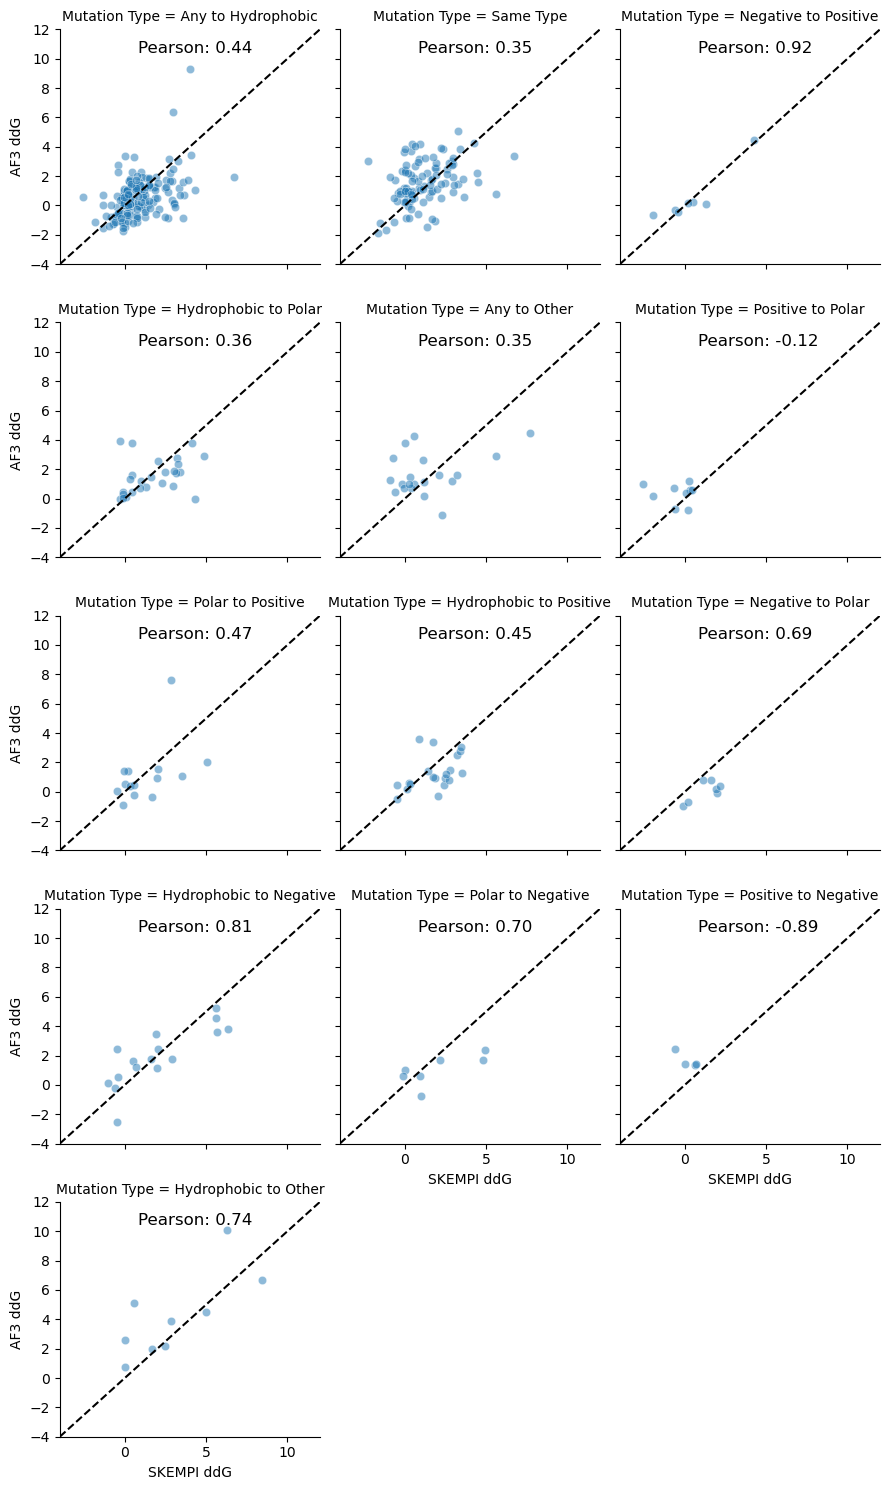

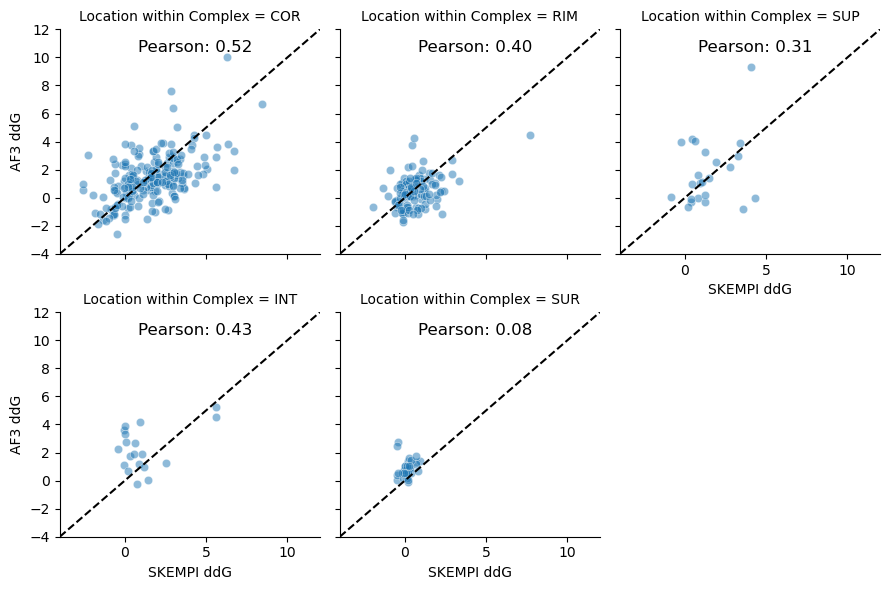

In [1033]:
af3temp = pandas.DataFrame({
    'SKEMPI ddG': SKEMPI_ddGs,
    'AF3 ddG': af3_ddGs,
    'PDB': PDBs,
    'Structure Type': Structure_Types,
    'Mutation Type': Mutation_Types,
    'Location within Complex': Locations
})

g = sns.FacetGrid(af3temp, col='PDB', col_wrap = 3, height = 3)

def scatter_with_correlation(data, **kwargs):
    # Scatter plot
    scatter = sns.scatterplot(x='SKEMPI ddG', y='AF3 ddG', data=data, **kwargs, alpha = 0.5)
    # Calculate the Pearson correlation
    corr, _ = scipy.stats.pearsonr(data['SKEMPI ddG'], data['AF3 ddG'])
    # Add the dashed line y = x (slope 1, intercept 0)
    plt.plot([-4, 12], 
             [-4, 12], 
             linestyle='--', color='black', label="y = x")
    scatter.set_xlim(left=-4, right=12)
    scatter.set_ylim(bottom=-4, top=12)
    # Annotate the Pearson correlation
    plt.annotate(f'Pearson: {corr:.2f}', 
                 xy=(0.3, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='black')
g.map_dataframe(scatter_with_correlation)
g.savefig('af3_by_PDB.pdf', format='pdf')

struc3 = sns.FacetGrid(af3temp, col='Structure Type', col_wrap = 3, height = 3)
struc3.map_dataframe(scatter_with_correlation)
struc3.savefig('af3_by_struc.pdf', format='pdf')

mut3 = sns.FacetGrid(af3temp, col='Mutation Type', col_wrap = 3, height = 3)
mut3.map_dataframe(scatter_with_correlation)
mut3.savefig('af3_by_muttype.pdf', format='pdf')

loc3 = sns.FacetGrid(af3temp, col='Location within Complex', col_wrap = 3, height = 3)
loc3.map_dataframe(scatter_with_correlation)
loc3.savefig('af3_by_loc.pdf', format='pdf')

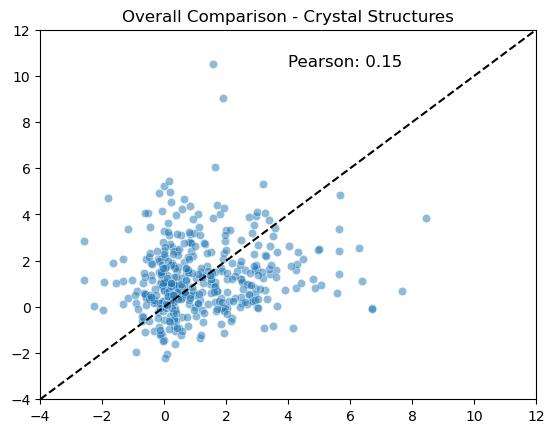

In [1061]:
scatter2 = sns.scatterplot(x='SKEMPI ddG', y='AF2 ddG', data=af2temp, alpha = 0.5)
corr, _ = scipy.stats.pearsonr(af2temp['SKEMPI ddG'], af2temp['AF2 ddG'])
    # Add the dashed line y = x (slope 1, intercept 0)
plt.plot([-4, 12], 
             [-4, 12], 
             linestyle='--', color='black', label="y = x")
scatter2.set_xlim(left=-4, right=12)
scatter2.set_ylim(bottom=-4, top=12)
scatter2.set(title = "Overall Comparison - AlphaFold2")
plt.annotate(f'Pearson: {corr:.2f}', 
                 xy=(0.5, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='black')
fig2 = scatter2.get_figure()
fig2.savefig("af2_overall_subset.pdf", format='pdf') 

plt.clf()

scatter3 = sns.scatterplot(x='SKEMPI ddG', y='AF3 ddG', data=af3temp, alpha = 0.5)
corr, _ = scipy.stats.pearsonr(af3temp['SKEMPI ddG'], af3temp['AF3 ddG'])
    # Add the dashed line y = x (slope 1, intercept 0)
plt.plot([-4, 12], 
             [-4, 12], 
             linestyle='--', color='black', label="y = x")
scatter3.set_xlim(left=-4, right=12)
scatter3.set_ylim(bottom=-4, top=12)
scatter3.set(title = "Overall Comparison - AlphaFold3")
plt.annotate(f'Pearson: {corr:.2f}', 
                 xy=(0.5, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='black')
fig3 = scatter3.get_figure()
fig3.savefig("af3_overall_subset.pdf", format='pdf') 

plt.clf()

scatterx = sns.scatterplot(x=SKEMPI_ddGs, y=xtal_ddGs, alpha = 0.5)
corr, _ = scipy.stats.pearsonr(SKEMPI_ddGs, xtal_ddGs)
    # Add the dashed line y = x (slope 1, intercept 0)
plt.plot([-4, 12], 
             [-4, 12], 
             linestyle='--', color='black', label="y = x")
scatterx.set_xlim(left=-4, right=12)
scatterx.set_ylim(bottom=-4, top=12)
scatterx.set(title = "Overall Comparison - Crystal Structures")
plt.annotate(f'Pearson: {corr:.2f}', 
                 xy=(0.5, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='black')
figx = scatterx.get_figure()
figx.savefig("xtal_overall.pdf", format='pdf') 

In [782]:
RMSDs_by_PDB_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RMSDs_by_PDB_3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_in_PDB = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
i = 0

while (i < len(af2_ddGs)):
    RMSD_2 = accuracyscore(SKEMPI_ddGs[i], af2_ddGs[i])
    RMSD_3 = accuracyscore(SKEMPI_ddGs[i], af3_ddGs[i])
    if (PDBs[i] == "1DAN"):
        RMSDs_by_PDB_2[0] += RMSD_2
        RMSDs_by_PDB_3[0] += RMSD_3
        num_in_PDB[0] += 1
    if (PDBs[i] == "1JTG"):
        RMSDs_by_PDB_2[1] += RMSD_2
        RMSDs_by_PDB_3[1] += RMSD_3
        num_in_PDB[1] += 1
    if (PDBs[i] == "1KTZ"):
        RMSDs_by_PDB_2[2] += RMSD_2
        RMSDs_by_PDB_3[2] += RMSD_3
        num_in_PDB[2] += 1
    if (PDBs[i] == "1OGA"):
        RMSDs_by_PDB_2[3] += RMSD_2
        RMSDs_by_PDB_3[3] += RMSD_3
        num_in_PDB[3] += 1
    if (PDBs[i] == "1VFB"):
        RMSDs_by_PDB_2[4] += RMSD_2
        RMSDs_by_PDB_3[4] += RMSD_3
        num_in_PDB[4] += 1
    if (PDBs[i] == "2J0T"):
        RMSDs_by_PDB_2[5] += RMSD_2
        RMSDs_by_PDB_3[5] += RMSD_3
        num_in_PDB[5] += 1
    if (PDBs[i] == "3BN9"):
        RMSDs_by_PDB_2[6] += RMSD_2
        RMSDs_by_PDB_3[6] += RMSD_3
        num_in_PDB[6] += 1
    if (PDBs[i] == "3MZG"):
        RMSDs_by_PDB_2[7] += RMSD_2
        RMSDs_by_PDB_3[7] += RMSD_3
        num_in_PDB[7] += 1
    if (PDBs[i] == "3SGB"):
        RMSDs_by_PDB_2[8] += RMSD_2
        RMSDs_by_PDB_3[8] += RMSD_3
        num_in_PDB[8] += 1
    if (PDBs[i] == "3SZK"):
        RMSDs_by_PDB_2[9] += RMSD_2
        RMSDs_by_PDB_3[9] += RMSD_3
        num_in_PDB[9] += 1
    if (PDBs[i] == "5E9D"):
        RMSDs_by_PDB_2[10] += RMSD_2
        RMSDs_by_PDB_3[10] += RMSD_3
        num_in_PDB[10] += 1
    i += 1
j = 0
while (j < 11):
    RMSDs_by_PDB_2[j] = math.sqrt(RMSDs_by_PDB_2[j]/num_in_PDB[j])
    RMSDs_by_PDB_3[j] = math.sqrt(RMSDs_by_PDB_3[j]/num_in_PDB[j])
    j += 1
print(num_in_PDB)
print(RMSDs_by_PDB_2)
print(RMSDs_by_PDB_3)

[89, 58, 27, 48, 48, 16, 35, 10, 191, 21, 5]
[1.8718616934262415, 1.733455329793054, 1.2705959281383172, 0.9064928286402697, 1.7599870754210012, 1.804844177642755, 1.7277055978290323, 1.6016128770166196, 1.6298691207214213, 1.05393443360256, 1.9709454704732876]
[1.8264529779513088, 1.5790251303971927, 1.5407485205336986, 1.2022637003597882, 1.5409477513821412, 2.439969477232863, 1.9415725456150008, 1.5259853646923214, 1.5135733835492815, 0.9688235360136692, 1.9325825400883576]


In [783]:
RMSDs_by_Loc_2 = [0, 0, 0, 0, 0]
RMSDs_by_Loc_3 = [0, 0, 0, 0, 0]
num_in_Loc = [0, 0, 0, 0, 0]
i = 0
while (i < len(af2_ddGs)):
    RMSD_2 = accuracyscore(SKEMPI_ddGs[i], af2_ddGs[i])
    RMSD_3 = accuracyscore(SKEMPI_ddGs[i], af3_ddGs[i])
    if (Locations[i] == "COR"):
        RMSDs_by_Loc_2[0] += RMSD_2
        RMSDs_by_Loc_3[0] += RMSD_3
        num_in_Loc[0] += 1
    if (Locations[i] == "INT"):
        RMSDs_by_Loc_2[1] += RMSD_2
        RMSDs_by_Loc_3[1] += RMSD_3
        num_in_Loc[1] += 1
    if (Locations[i] == "RIM"):
        RMSDs_by_Loc_2[2] += RMSD_2
        RMSDs_by_Loc_3[2] += RMSD_3
        num_in_Loc[2] += 1
    if (Locations[i] == "SUP"):
        RMSDs_by_Loc_2[3] += RMSD_2
        RMSDs_by_Loc_3[3] += RMSD_3
        num_in_Loc[3] += 1
    if (Locations[i] == "SUR"):
        RMSDs_by_Loc_2[4] += RMSD_2
        RMSDs_by_Loc_3[4] += RMSD_3
        num_in_Loc[4] += 1
    i += 1
j = 0
while (j < 5):
    RMSDs_by_Loc_2[j] = math.sqrt(RMSDs_by_Loc_2[j]/num_in_Loc[j])
    RMSDs_by_Loc_3[j] = math.sqrt(RMSDs_by_Loc_3[j]/num_in_Loc[j])
    j += 1
print(num_in_Loc)
print(RMSDs_by_Loc_2)
print(RMSDs_by_Loc_3)

[723, 67, 435, 119, 106]
[2.492380746008364, 2.1946412333633014, 1.369194770202307, 2.241824663590659, 1.0253961939153726]
[2.560074820252646, 2.1509833702867094, 1.3506028905086878, 2.728367222958635, 1.0054421808352785]


In [784]:
RMSDs_by_MutType_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RMSDs_by_MutType_3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_in_MutType = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
i = 0
while (i < len(af2_ddGs)):
    RMSD_2 = accuracyscore(SKEMPI_ddGs[i], af2_ddGs[i])
    RMSD_3 = accuracyscore(SKEMPI_ddGs[i], af3_ddGs[i])
    if (Mutation_Types[i] == "Same Type"):
        RMSDs_by_MutType_2[0] += RMSD_2
        RMSDs_by_MutType_3[0] += RMSD_3
        num_in_MutType[0] += 1
    if (Mutation_Types[i] == "Hydrophobic to Negative"):
        RMSDs_by_MutType_2[1] += RMSD_2
        RMSDs_by_MutType_3[1] += RMSD_3
        num_in_MutType[1] += 1
    if (Mutation_Types[i] == "Negative to Polar"):
        RMSDs_by_MutType_2[2] += RMSD_2
        RMSDs_by_MutType_3[2] += RMSD_3
        num_in_MutType[2] += 1
    if (Mutation_Types[i] == "Positive to Negative"):
        RMSDs_by_MutType_2[3] += RMSD_2
        RMSDs_by_MutType_3[3] += RMSD_3
        num_in_MutType[3] += 1
    if (Mutation_Types[i] == "Any to Hydrophobic"):
        RMSDs_by_MutType_2[4] += RMSD_2
        RMSDs_by_MutType_3[4] += RMSD_3
        num_in_MutType[4] += 1
    if (Mutation_Types[i] == "Polar to Negative"):
        RMSDs_by_MutType_2[5] += RMSD_2
        RMSDs_by_MutType_3[5] += RMSD_3
        num_in_MutType[5] += 1
    if (Mutation_Types[i] == "Negative to Positive"):
        RMSDs_by_MutType_2[6] += RMSD_2
        RMSDs_by_MutType_3[6] += RMSD_3
        num_in_MutType[6] += 1
    if (Mutation_Types[i] == "Polar to Positive"):
        RMSDs_by_MutType_2[7] += RMSD_2
        RMSDs_by_MutType_3[7] += RMSD_3
        num_in_MutType[7] += 1
    if (Mutation_Types[i] == "Any to Other"):
        RMSDs_by_MutType_2[8] += RMSD_2
        RMSDs_by_MutType_3[8] += RMSD_3
        num_in_MutType[8] += 1
    if (Mutation_Types[i] == "Hydrophobic to Polar"):
        RMSDs_by_MutType_2[9] += RMSD_2
        RMSDs_by_MutType_3[9] += RMSD_3
        num_in_MutType[9] += 1
    if (Mutation_Types[i] == "Hydrophobic to Positive"):
        RMSDs_by_MutType_2[10] += RMSD_2
        RMSDs_by_MutType_3[10] += RMSD_3
        num_in_MutType[10] += 1
    if (Mutation_Types[i] == "Positive to Polar"):
        RMSDs_by_MutType_2[11] += RMSD_2
        RMSDs_by_MutType_3[11] += RMSD_3
        num_in_MutType[11] += 1
    if (Mutation_Types[i] == "Hydrophobic to Other"):
        RMSDs_by_MutType_2[12] += RMSD_2
        RMSDs_by_MutType_3[12] += RMSD_3
        num_in_MutType[12] += 1
    i += 1
j = 0
while (j < 13):
    RMSDs_by_MutType_2[j] = math.sqrt(RMSDs_by_MutType_2[j]/num_in_MutType[j])
    RMSDs_by_MutType_3[j] = math.sqrt(RMSDs_by_MutType_3[j]/num_in_MutType[j])
   # print(RMSDs_by_MutType_3[j])
    j += 1
print(num_in_MutType)
print(RMSDs_by_MutType_2)
print(RMSDs_by_MutType_3)

[346, 52, 29, 33, 549, 36, 24, 41, 76, 99, 72, 46, 47]
[2.2534522672805752, 1.935021138855702, 1.565031471039279, 2.6262978726810338, 2.0285743038435857, 1.969998687690278, 1.845840752649976, 1.633373394947884, 2.5851914353227334, 1.4250905138813836, 1.5642395033201706, 2.818149319349892, 2.2973542842741947]
[2.3118282342167515, 1.9762259099812673, 1.8638257671926914, 2.6092803306962367, 2.144229092167429, 2.0924918423133763, 1.6548230397858807, 1.738372512126002, 2.648537924090631, 1.4686707798110785, 1.6096108310419495, 2.850836228003965, 2.435714621775796]


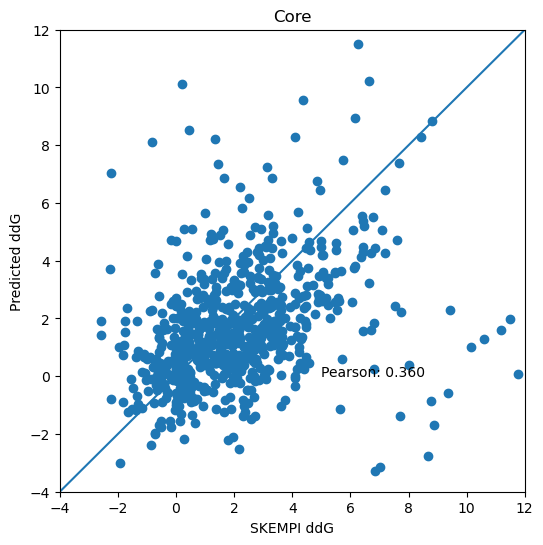

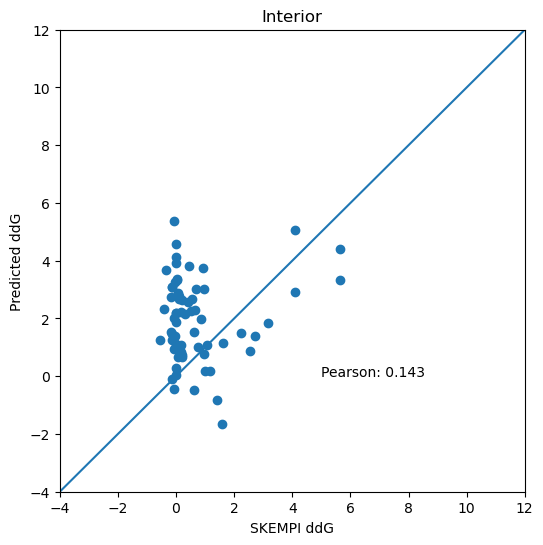

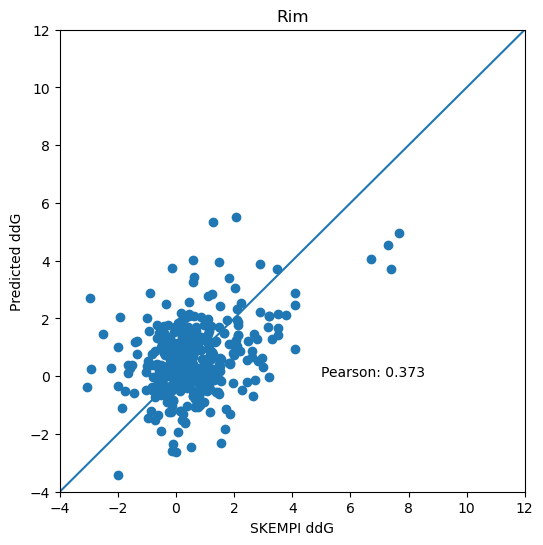

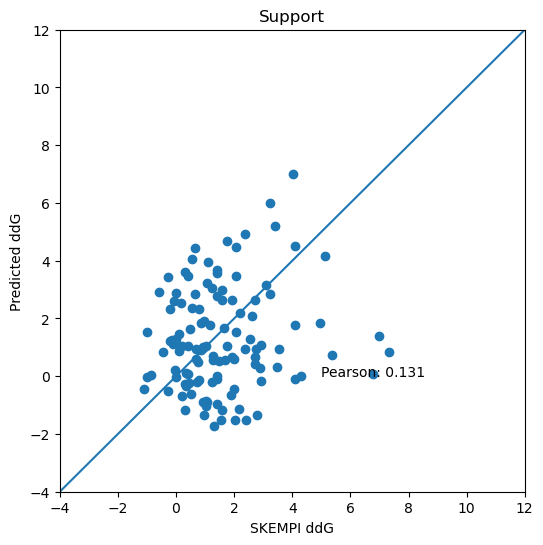

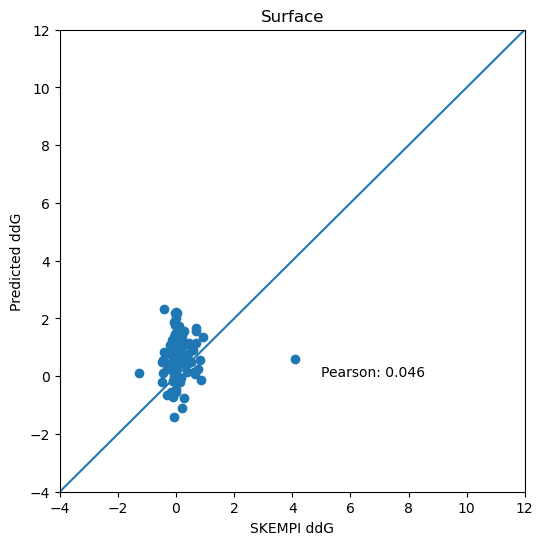

In [785]:
#getcorrelation(SKEMPI_ddGs, af2_ddGs, "AF2 Test")
Core = []
Interior = []
Rim = []
Support = []
Surface = []
SKEMPI_Cor = []
SKEMPI_Int = []
SKEMPI_Rim = []
SKEMPI_Sup = []
SKEMPI_Sur = []
i = 0
while (i < len(af2_ddGs)):
    if (Locations[i] == "COR"):
        Core.append(af2_ddGs[i])
        SKEMPI_Cor.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "INT"):
        Interior.append(af2_ddGs[i])
        SKEMPI_Int.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "RIM"):
        Rim.append(af2_ddGs[i])
        SKEMPI_Rim.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "SUP"):
        Support.append(af2_ddGs[i])
        SKEMPI_Sup.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "SUR"):
        Surface.append(af2_ddGs[i])
        SKEMPI_Sur.append(SKEMPI_ddGs[i])
    i += 1
getcorrelation(SKEMPI_Cor, Core, "Core")
getcorrelation(SKEMPI_Int, Interior, "Interior")
getcorrelation(SKEMPI_Rim, Rim, "Rim")
getcorrelation(SKEMPI_Sup, Support, "Support")
getcorrelation(SKEMPI_Sur, Surface, "Surface")

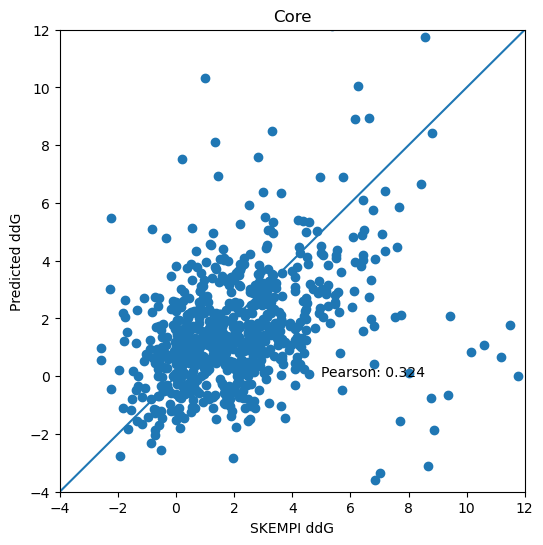

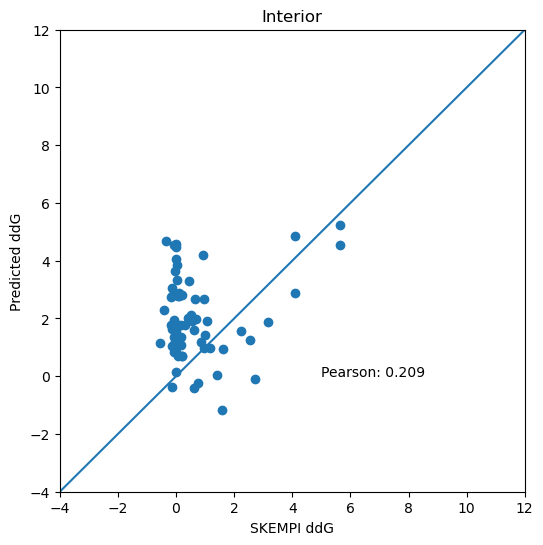

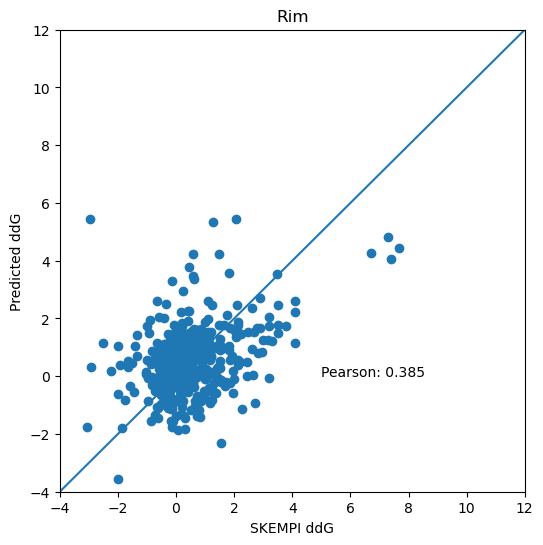

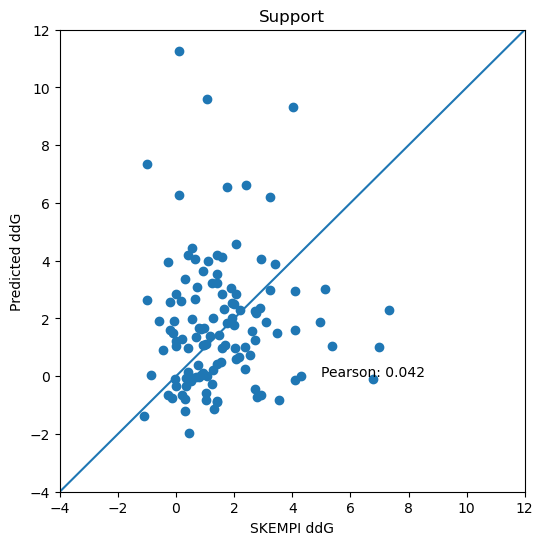

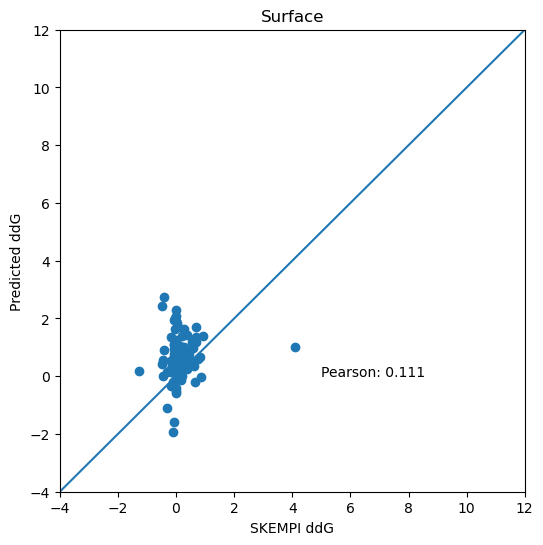

In [787]:
#getcorrelation(SKEMPI_ddGs, af3_ddGs, "AF3 Test")
Core_3 = []
Interior_3 = []
Rim_3 = []
Support_3 = []
Surface_3 = []
SKEMPI_Cor = []
SKEMPI_Int = []
SKEMPI_Rim = []
SKEMPI_Sup = []
SKEMPI_Sur = []

Core_x = []
Interior_x = []
Rim_x = []
Support_x = []
Surface_x = []
i = 0
while (i < len(af3_ddGs)):
    if (Locations[i] == "COR"):
        Core_3.append(af3_ddGs[i])
        #Core_x.append(xtal_ddGs[i])
        SKEMPI_Cor.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "INT"):
        Interior_3.append(af3_ddGs[i])
       # Interior_x.append(xtal_ddGs[i])
        SKEMPI_Int.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "RIM"):
        Rim_3.append(af3_ddGs[i])
      #  Rim_x.append(xtal_ddGs[i])
        SKEMPI_Rim.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "SUP"):
        Support_3.append(af3_ddGs[i])
      #  Support_x.append(xtal_ddGs[i])
        SKEMPI_Sup.append(SKEMPI_ddGs[i])
    elif (Locations[i] == "SUR"):
        Surface_3.append(af3_ddGs[i])
       # Surface_x.append(xtal_ddGs[i])
        SKEMPI_Sur.append(SKEMPI_ddGs[i])
    i += 1
getcorrelation(SKEMPI_Cor, Core_3, "Core")
getcorrelation(SKEMPI_Int, Interior_3, "Interior")
getcorrelation(SKEMPI_Rim, Rim_3, "Rim")
getcorrelation(SKEMPI_Sup, Support_3, "Support")
getcorrelation(SKEMPI_Sur, Surface_3, "Surface")

In [788]:
i = 0
reds = 0
reds_3 = 0
reds_x = 0
blues = 0
blues_3 = 0
blues_x = 0
while (i < len(SKEMPI_Sur)):
    if (SKEMPI_Sur[i] > 0):
        reds += 1
        if (Surface_3[i] > 0):
            reds_3 += 1
        if (Surface_x[i] > 0):
            reds_x += 1
    else:
        blues += 1
        if (Surface_3[i] <= 0):
            blues_3 += 1
        if (Surface_x[i] <= 0):
            blues_x += 1
    i += 1
print(reds)
print(reds_3)
print(reds_x)
print(blues)
print(blues_3)
print(blues_x)

IndexError: list index out of range

In [ ]:
SKEMPI_MutType = [[], [], [], [], [], [], [], [], [], [], [], [], []]
By_MutType_2 = [[], [], [], [], [], [], [], [], [], [], [], [], []]
By_MutType_3 = [[], [], [], [], [], [], [], [], [], [], [], [], []]
i = 0
while (i < len(af2_ddGs)):
    if (Mutation_Types[i] == "Same Type"):
        SKEMPI_MutType[0].append(SKEMPI_ddGs[i])
        By_MutType_2[0].append(af2_ddGs[i])
        By_MutType_3[0].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Hydrophobic to Negative"):
        SKEMPI_MutType[1].append(SKEMPI_ddGs[i])
        By_MutType_2[1].append(af2_ddGs[i])
        By_MutType_3[1].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Negative to Polar"):
        SKEMPI_MutType[2].append(SKEMPI_ddGs[i])
        By_MutType_2[2].append(af2_ddGs[i])
        By_MutType_3[2].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Positive to Negative"):
        SKEMPI_MutType[3].append(SKEMPI_ddGs[i])
        By_MutType_2[3].append(af2_ddGs[i])
        By_MutType_3[3].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Any to Hydrophobic"):
        SKEMPI_MutType[4].append(SKEMPI_ddGs[i])
        By_MutType_2[4].append(af2_ddGs[i])
        By_MutType_3[4].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Polar to Negative"):
        SKEMPI_MutType[5].append(SKEMPI_ddGs[i])
        By_MutType_2[5].append(af2_ddGs[i])
        By_MutType_3[5].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Negative to Positive"):
        SKEMPI_MutType[6].append(SKEMPI_ddGs[i])
        By_MutType_2[6].append(af2_ddGs[i])
        By_MutType_3[6].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Polar to Positive"):
        SKEMPI_MutType[7].append(SKEMPI_ddGs[i])
        By_MutType_2[7].append(af2_ddGs[i])
        By_MutType_3[7].append(af3_ddGs[i])
        #print(Mutations[i])
        #print(af3_ddGs[i])
    if (Mutation_Types[i] == "Any to Other"):
        SKEMPI_MutType[8].append(SKEMPI_ddGs[i])
        By_MutType_2[8].append(af2_ddGs[i])
        By_MutType_3[8].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Hydrophobic to Polar"):
        SKEMPI_MutType[9].append(SKEMPI_ddGs[i])
        By_MutType_2[9].append(af2_ddGs[i])
        By_MutType_3[9].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Hydrophobic to Positive"):
        SKEMPI_MutType[10].append(SKEMPI_ddGs[i])
        By_MutType_2[10].append(af2_ddGs[i])
        By_MutType_3[10].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Positive to Polar"):
        SKEMPI_MutType[11].append(SKEMPI_ddGs[i])
        By_MutType_2[11].append(af2_ddGs[i])
        By_MutType_3[11].append(af3_ddGs[i])
    if (Mutation_Types[i] == "Hydrophobic to Other"):
        SKEMPI_MutType[12].append(SKEMPI_ddGs[i])
        By_MutType_2[12].append(af2_ddGs[i])
        By_MutType_3[12].append(af3_ddGs[i])
    i += 1
j = 0
while (j < 13):
    getcorrelation(SKEMPI_MutType[j], By_MutType_2[j], "AF2 - " + str(j))
    j += 1

In [ ]:
j = 0
while (j < 13):
    getcorrelation(SKEMPI_MutType[j], By_MutType_3[j], "AF3 - " + str(j))
    j += 1

In [ ]:
PPIs_S = [[],[],[],[]]
PPIs_2 = [[],[],[],[]]
PPIs_3 = [[],[],[],[]]
#print(Structure_Types)
i = 0
while (i < len(af2_ddGs)):
    if (Structure_Types[i] == "AB/AG"):
        PPIs_S[0].append(SKEMPI_ddGs[i])
        PPIs_2[0].append(af2_ddGs[i])
        PPIs_3[0].append(af3_ddGs[i])
    elif (Structure_Types[i] == "Pr/PI"):
        PPIs_S[1].append(SKEMPI_ddGs[i])
        PPIs_2[1].append(af2_ddGs[i])
        PPIs_3[1].append(af3_ddGs[i])
    elif (Structure_Types[i] == "TCR/pMHC"):
        PPIs_S[2].append(SKEMPI_ddGs[i])
        PPIs_2[2].append(af2_ddGs[i])
        PPIs_3[2].append(af3_ddGs[i])
    elif (Structure_Types[i] == "Other"):
        PPIs_S[3].append(SKEMPI_ddGs[i])
        PPIs_2[3].append(af2_ddGs[i])
        PPIs_3[3].append(af3_ddGs[i])
    else:
        print("Aaaah")
    i += 1
j = 0
while (j < 4):
    getcorrelation(PPIs_S[j], PPIs_3[j], "AF3 - " + str(j))
    j += 1

In [793]:
scipy.stats.ttest_rel(af2_ddGs, af3_ddGs)

TtestResult(statistic=0.4612008364937882, pvalue=0.6447237403911121, df=1449)

In [791]:
def accuracytest(threshold):
    i = 0
    acc2 = 0
    acc3 = 0
    for each in SKEMPI_ddGs:
        diff2 = abs(each - af2_ddGs[i])
        diff3 = abs(each - af3_ddGs[i])
        i += 1
        if (diff2 < threshold):
            acc2 += 1
        if (diff3 < threshold):
            acc3 += 1
    #print(acc2/len(SKEMPI_ddGs))
    #print(acc3/len(SKEMPI_ddGs))
    acc2 /= len(SKEMPI_ddGs)
    acc3 /= len(SKEMPI_ddGs)
    return acc2, acc3

In [525]:
accsx = []
for threshold in thresholds:
    i = 0
    accx = 0
    for each in SKEMPI_xtal:
        try:
            diffx = abs(each - xtal_ddGs[i])
        except:
            print("AAAA")
            print(xtal_ddGs[i])
        i += 1
        if (diffx < threshold):
            accx += 1
    #print(accx/len(SKEMPI_ddGs))
    accx /= len(SKEMPI_xtal)
    accsx.append(accx)
print(len(SKEMPI_xtal))
print(accsx)

411
[0.1070559610705596, 0.2141119221411192, 0.40875912408759124, 0.5742092457420924, 0.7031630170316302, 0.8199513381995134, 0.8856447688564477]


[0.11724137931034483, 0.23379310344827586, 0.4579310344827586, 0.6427586206896552, 0.7579310344827587, 0.8372413793103448, 0.8944827586206896]


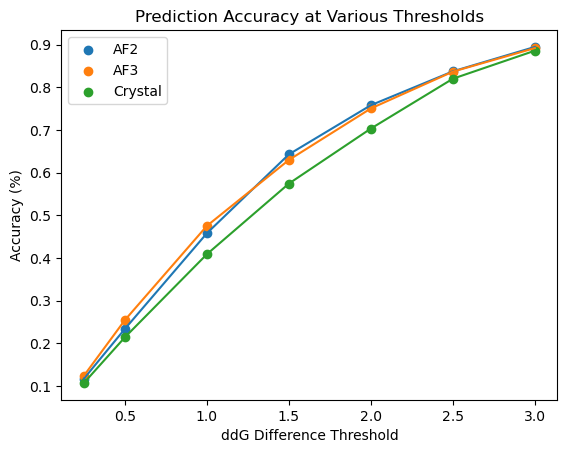

In [767]:
accs2 = []
accs3 = []
thresholds = [0.25, 0.5, 1, 1.5, 2, 2.5, 3]
for each in thresholds:
    acc2, acc3 = accuracytest(each)
    accs2.append(acc2)
    accs3.append(acc3)
print(accs2)
plt.plot(thresholds, accs2)
plt.scatter(thresholds, accs2, label = "AF2")
plt.scatter(thresholds, accs3, label = "AF3")
plt.scatter(thresholds, accsx, label = "Crystal")
plt.ylabel("Accuracy (%)")
plt.xlabel("ddG Difference Threshold")
plt.title("Prediction Accuracy at Various Thresholds")
plt.plot(thresholds, accs3)
plt.plot(thresholds, accsx)
plt.legend()
plt.savefig("acc_curve.pdf", format='pdf') 

In [797]:
def roccurve(threshold):
    SKEMPI_xtal_tf = []
    SKEMPI_tf = []
    i = 0
    while (i < len(SKEMPI_ddGs)):
        if (SKEMPI_ddGs[i] < threshold):
            SKEMPI_tf.append(0)
        else:
            SKEMPI_tf.append(1)
        i += 1
    i = 0
    while (i < len(SKEMPI_xtal)):
        #print("hi")
        if (SKEMPI_xtal[i] < threshold):
            SKEMPI_xtal_tf.append(0)
        else:
            SKEMPI_xtal_tf.append(1)
        i += 1
    fpr, tpr, thresholds = roc_curve(SKEMPI_tf, af2_ddGs) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='AF2 ROC (area = %0.2f)' % roc_auc)
    fpr, tpr, thresholds = roc_curve(SKEMPI_tf, af3_ddGs) 
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='AF3 ROC (area = %0.2f)' % roc_auc)
    fpr, tpr, thresholds = roc_curve(SKEMPI_xtal_tf, xtal_ddGs) 
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Xtal ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for ddG Classification at ' + str(threshold))
    plt.legend()
    plt.savefig("ROC_" + str(threshold) + "_ddG.pdf")

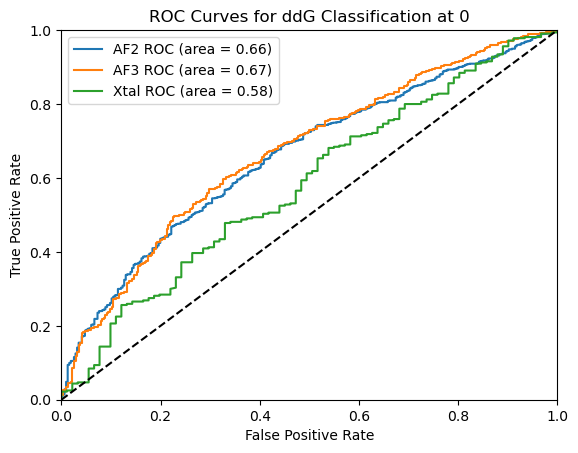

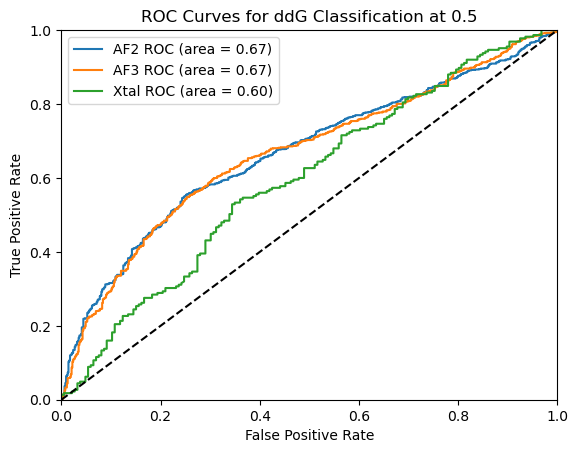

In [799]:
roccurve(0)
roccurve(0.5)

314
270
262
97
26
21


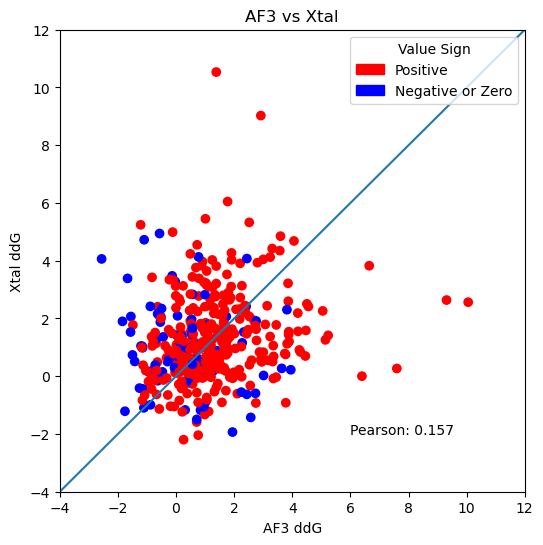

In [565]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)
colors = []
reds = 0
blues = 0
reds_3 = 0
reds_x = 0
blues_3 = 0
blues_x = 0
for each in SKEMPI_ddGs:
    if each > 0:
        colors.append("red")
        reds += 1
    else:
        colors.append("blue")
        blues += 1
i = 0
while (i < len(SKEMPI_ddGs)):
    if (colors[i] == "red" and af2_ddGs[i] > 0):
        reds_3 += 1
    elif (colors[i] == "blue" and af2_ddGs[i] <= 0):
        blues_3 += 1
    if (colors[i] == "red" and xtal_ddGs[i] > 0):
        reds_x += 1
    elif (colors[i] == "blue" and xtal_ddGs[i] <= 0):
        blues_x += 1
    i += 1
print(reds)
print(reds_3)
print(reds_x)
print(blues)
print(blues_3)
print(blues_x)
plt.scatter(af3_ddGs, xtal_ddGs, c = colors)
ax.set_xlim([-4, 12])
ax.set_ylim([-4, 12])
plt.xlabel("AF3 ddG")
plt.ylabel("Xtal ddG")
plt.title("AF3 vs Xtal")
plt.axline((0, 0), slope=1)
legend_handles = [
    mpatches.Patch(color='red', label='Positive'),
    mpatches.Patch(color='blue', label='Negative or Zero'),
]

plt.legend(handles=legend_handles, title="Value Sign")
xpos = 5
plt.text(6, -2, "Pearson: %.3f" % numpy.corrcoef(af3_ddGs, xtal_ddGs)[1][0])
plt.show()

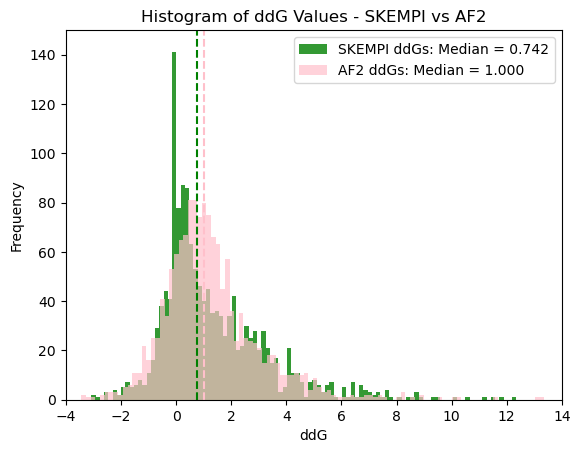

In [1015]:
plt.hist(SKEMPI_ddGs, bins = 100, color = "green", alpha = 0.8, label = "SKEMPI ddGs: Median = " + str(numpy.median(SKEMPI_ddGs))[0:5])
plt.hist(af2_ddGs, bins = 100, color = "pink", alpha = 0.7, label = "AF2 ddGs: Median = " + str(numpy.median(af2_ddGs))[0:5])
plt.axvline(x = numpy.median(SKEMPI_ddGs), color = "green", linestyle = "--")
plt.axvline(x = numpy.median(af2_ddGs), color = "pink", linestyle = "--")
plt.xlim(-4, 14)
plt.ylim(0, 150)
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values - SKEMPI vs AF2")
plt.legend()
plt.savefig("SKEMPI_af2_hist.pdf")
plt.show()

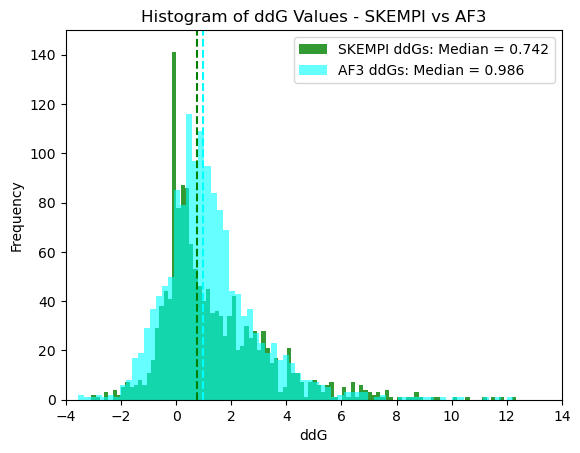

In [1017]:
plt.hist(SKEMPI_ddGs, bins = 100, color = "green", alpha = 0.8, label = "SKEMPI ddGs: Median = " + str(numpy.median(SKEMPI_ddGs))[0:5])
plt.hist(af3_ddGs, bins = 100, color = "cyan", alpha = 0.6, label = "AF3 ddGs: Median = " + str(numpy.median(af3_ddGs))[0:5])
plt.axvline(x = numpy.median(SKEMPI_ddGs), color = "green", linestyle = "--")
plt.axvline(x = numpy.median(af3_ddGs), color = "cyan", linestyle = "--")
plt.xlim(-4, 14)
plt.ylim(0, 150)
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values - SKEMPI vs AF3")
plt.legend()
plt.savefig("SKEMPI_af3_hist.pdf")
plt.show()

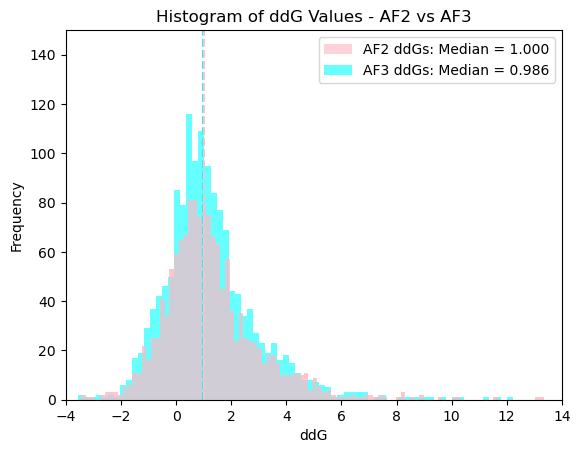

In [1019]:
plt.hist(af2_ddGs, bins = 100, color = "pink", alpha = 0.7, label = "AF2 ddGs: Median = " + str(numpy.median(af2_ddGs))[0:5])
plt.hist(af3_ddGs, bins = 100, color = "cyan", alpha = 0.6, label = "AF3 ddGs: Median = " + str(numpy.median(af3_ddGs))[0:5])
plt.hist(af2_ddGs, bins = 100, color = "pink", alpha = 0.7)
plt.axvline(x = numpy.median(af3_ddGs), color = "cyan", linestyle = "--")
plt.axvline(x = numpy.median(af2_ddGs), color = "pink", linestyle = "--")
plt.xlim(-4, 14)
plt.ylim(0, 150)
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values - AF2 vs AF3")
plt.legend()
plt.savefig("af2_af3_hist.pdf")
plt.show()

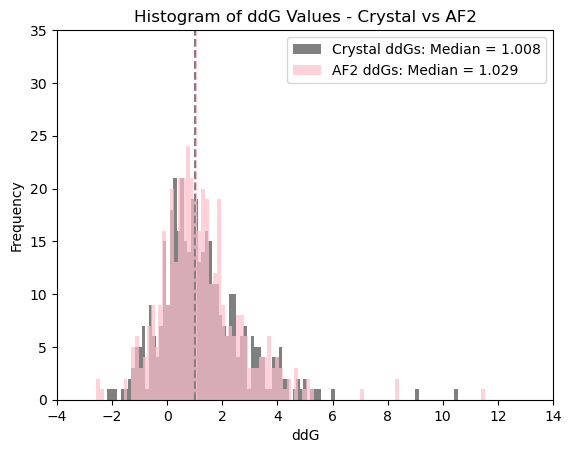

In [1005]:
plt.hist(xtal_ddGs, bins = 100, color = "gray", alpha = 1, label = "Crystal ddGs: Median = " + str(numpy.median(xtal_ddGs))[0:5])
plt.hist(af2_ddGs, bins = 100, color = "pink", alpha = 0.7, label = "AF2 ddGs: Median = " + str(numpy.median(af2_ddGs))[0:5])
plt.axvline(x = numpy.median(af2_ddGs), color = "pink", linestyle = "--")
plt.axvline(x = numpy.median(xtal_ddGs), color = "gray", linestyle = "--")
plt.xlim(-4, 14)
plt.ylim(0, 35)
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values - Crystal vs AF2")
plt.legend()
plt.savefig("af2_xtal_hist.pdf")
plt.show()

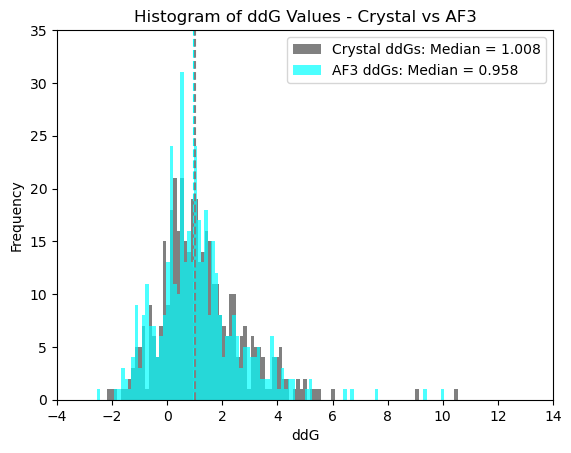

In [1007]:
plt.hist(xtal_ddGs, bins = 100, color = "gray", alpha = 1, label = "Crystal ddGs: Median = " + str(numpy.median(xtal_ddGs))[0:5])
plt.hist(af3_ddGs, bins = 100, color = "cyan", alpha = 0.7, label = "AF3 ddGs: Median = " + str(numpy.median(af3_ddGs))[0:5])
plt.axvline(x = numpy.median(af3_ddGs), color = "cyan", linestyle = "--")
plt.axvline(x = numpy.median(xtal_ddGs), color = "gray", linestyle = "--")
plt.xlim(-4, 14)
plt.ylim(0, 35)
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values - Crystal vs AF3")
plt.legend()
plt.savefig("af3_xtal_hist.pdf")
plt.show()

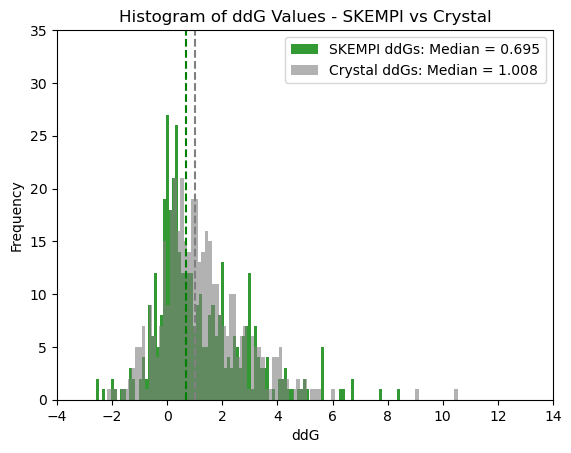

In [1009]:
plt.hist(SKEMPI_ddGs, bins = 100, color = "green", alpha = 0.8, label = "SKEMPI ddGs: Median = " + str(numpy.median(SKEMPI_ddGs))[0:5])
plt.hist(xtal_ddGs, bins = 100, color = "gray", alpha = 0.6, label = "Crystal ddGs: Median = " + str(numpy.median(xtal_ddGs))[0:5])
plt.axvline(x = numpy.median(SKEMPI_ddGs), color = "green", linestyle = "--")
plt.axvline(x = numpy.median(xtal_ddGs), color = "gray", linestyle = "--")
plt.xlim(-4, 14)
plt.ylim(0, 35)
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values - SKEMPI vs Crystal")
plt.legend()
plt.savefig("SKEMPI_xtal_hist.pdf")
plt.show()

In [971]:
print(numpy.median(SKEMPI_ddGs))
print(numpy.median(xtal_ddGs))
print(numpy.median(af2_ddGs))
print(numpy.median(af3_ddGs))

0.6956096290622998
1.0081609195402512
1.0290804597700598
0.9586206896552416
